##📁 Data Preparation Phase

In [1]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading and Viewing the Dataset

df = pd.read_csv('Courses.csv')

###▫️ Review the Dataset Before Processing:

- This helps in understanding the dataset before any further processings.

In [3]:
df.head(5)

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,...,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,...,0,19/12/2012,17/11/2013,NaN,9.0,NaN,NaN,0,NaN,1.0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,...,0,15/10/2012,NaN,NaN,9.0,NaN,1.0,0,NaN,1.0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,...,0,08/02/2013,17/11/2013,NaN,16.0,NaN,NaN,0,NaN,1.0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,...,0,17/09/2012,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,...,0,19/12/2012,NaN,NaN,16.0,NaN,NaN,0,NaN,1.0


🔺 Notice the features and their values!

In [4]:
df.shape

(641138, 21)

🔺 Huge dataset!

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641138 entries, 0 to 641137
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              641138 non-null  int64  
 1   course_id          641138 non-null  object 
 2   userid_DI          641138 non-null  object 
 3   registered         641138 non-null  int64  
 4   viewed             641138 non-null  int64  
 5   explored           641138 non-null  int64  
 6   certified          641138 non-null  int64  
 7   final_cc_cname_DI  641138 non-null  object 
 8   LoE_DI             535130 non-null  object 
 9   YoB                544533 non-null  float64
 10  gender             554332 non-null  object 
 11  grade              592766 non-null  object 
 12  start_time_DI      641138 non-null  object 
 13  last_event_DI      462184 non-null  object 
 14  nevents            441987 non-null  float64
 15  ndays_act          478395 non-null  float64
 16  np

In [6]:
df.describe()

,index,registered,viewed,explored,certified,YoB,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
count,641138.000000,641138.0,641138.000000,641138.000000,641138.000000,544533.000000,441987.000000,478395.000000,183608.000000,382385.000000,641138.000000,0.0,100161.0
mean,320568.500000,1.0,0.624299,0.061899,0.027587,1985.253279,431.008018,5.710254,114.844173,3.634423,0.018968,NaN,1.0
std,185080.742781,0.0,0.484304,0.240973,0.163786,8.891814,1516.116057,11.866471,426.996844,4.490987,0.229539,NaN,0.0
min,0.000000,1.0,0.000000,0.000000,0.000000,1931.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN,1.0
25%,160284.250000,1.0,0.000000,0.000000,0.000000,1982.000000,3.000000,1.000000,5.000000,1.000000,0.000000,NaN,1.0
50%,320568.500000,1.0,1.000000,0.000000,0.000000,1988.000000,24.000000,2.000000,18.000000,2.000000,0.000000,NaN,1.0
75%,480852.750000,1.0,1.000000,0.000000,0.000000,1991.000000,158.000000,4.000000,73.000000,4.000000,0.000000,NaN,1.0
max,641137.000000,1.0,1.000000,1.000000,1.000000,2013.000000,197757.000000,205.000000,98517.000000,48.000000,20.000000,NaN,1.0


In [7]:
df.dtypes

,0
index,int64
course_id,object
userid_DI,object
registered,int64
viewed,int64
explored,int64
certified,int64
final_cc_cname_DI,object
LoE_DI,object
YoB,float64


🔺 Must convert some features to their appropriate type!

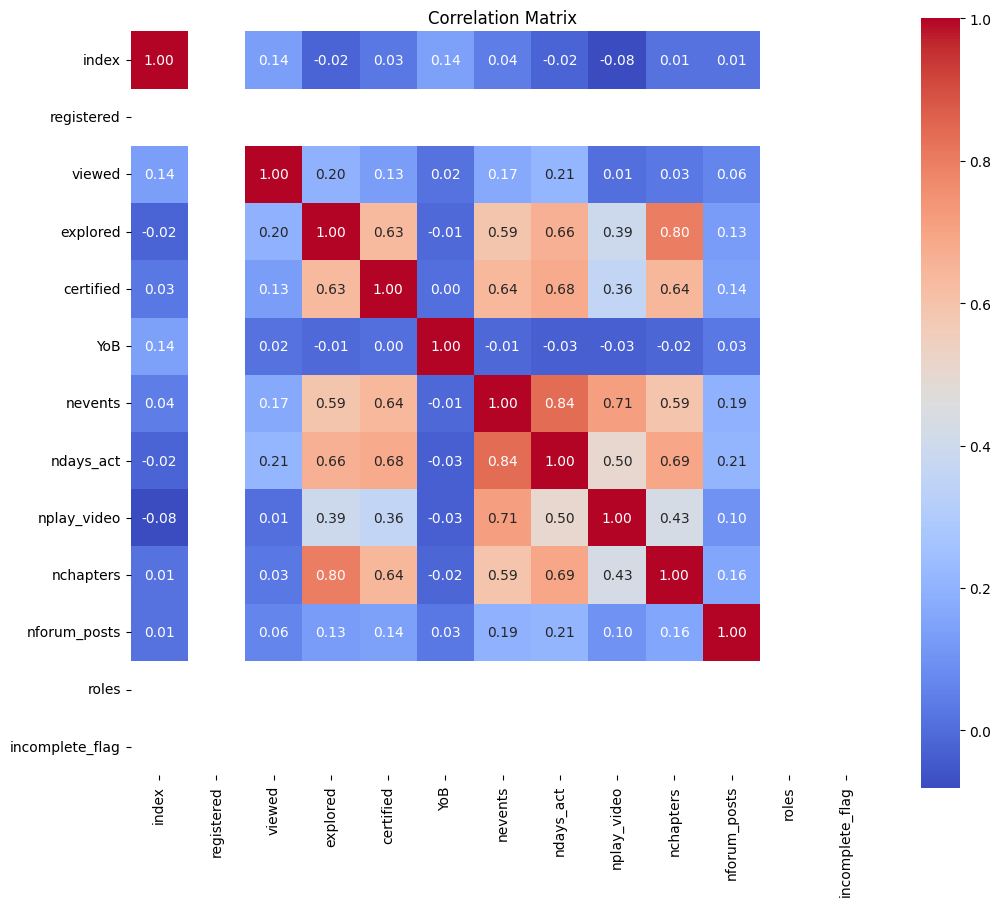

In [8]:
# View the correlation between numeric features before processing
# Improtant for deciding the relations for the target class (discussed later)

numeric_data = df.select_dtypes(include=['number']) # Select only numeric columns

corr = numeric_data.corr() # Compute the correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

🔺 Notice **'certified'** + **'nchapters'** + **'nevents'** + **'ndays_act'** + **'explored'**!

In [9]:
# Display the sum of missing values for every feature
pd.set_option('display.max_rows',100)
df.isnull().sum().sort_values()

,0
index,0
course_id,0
userid_DI,0
registered,0
viewed,0
explored,0
certified,0
final_cc_cname_DI,0
start_time_DI,0
nforum_posts,0


In [10]:
pd.set_option('display.max_rows',100)
df.isnull().mean().sort_values()

,0
index,0.000000
course_id,0.000000
userid_DI,0.000000
registered,0.000000
viewed,0.000000
explored,0.000000
certified,0.000000
final_cc_cname_DI,0.000000
start_time_DI,0.000000
nforum_posts,0.000000


###▫️ Data Processing:

- Now, after understood and viewed the dataset, we will begin processing.
- This includes remove unnecessary features, handle missing values, and convert features to their appropriate type.

In [11]:
# Make a copy to track the dataset from this stage
data1 = df.copy()

In [12]:
# Remove unnecessary features
data1 = data1.drop(columns = 'roles')
data1 = data1.drop(columns = 'nplay_video')
data1 = data1.drop(columns = 'incomplete_flag')

In [13]:
data1.shape

(641138, 18)

In [14]:
data1.head(5)

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,NaN,NaN,0,19/12/2012,17/11/2013,NaN,9.0,NaN,0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,NaN,NaN,NaN,0,15/10/2012,NaN,NaN,9.0,1.0,0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,08/02/2013,17/11/2013,NaN,16.0,NaN,0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,17/09/2012,NaN,NaN,16.0,NaN,0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,NaN,NaN,0,19/12/2012,NaN,NaN,16.0,NaN,0


In [15]:
data1.loc[:, 'LoE_DI'] = data1['LoE_DI'].fillna(data1['LoE_DI'].mode()[0])
# Filling the missing values with the most frequently occurring category

In [16]:
data1.head(5)

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Bachelor's,NaN,NaN,0,19/12/2012,17/11/2013,NaN,9.0,NaN,0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Bachelor's,NaN,NaN,0,15/10/2012,NaN,NaN,9.0,1.0,0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,NaN,NaN,0,08/02/2013,17/11/2013,NaN,16.0,NaN,0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,Bachelor's,NaN,NaN,0,17/09/2012,NaN,NaN,16.0,NaN,0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,NaN,NaN,0,19/12/2012,NaN,NaN,16.0,NaN,0


In [17]:
missing_indices = data1[data1['gender'].isnull()].index
data1.loc[missing_indices, 'gender'] = np.random.choice(
    data1['gender'].dropna(), size=len(missing_indices))
# Replacing those missing values with a random sample from the existing (non-null) values

In [18]:
data1.head(5)

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Bachelor's,NaN,f,0,19/12/2012,17/11/2013,NaN,9.0,NaN,0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Bachelor's,NaN,m,0,15/10/2012,NaN,NaN,9.0,1.0,0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,NaN,f,0,08/02/2013,17/11/2013,NaN,16.0,NaN,0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,Bachelor's,NaN,m,0,17/09/2012,NaN,NaN,16.0,NaN,0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,NaN,f,0,19/12/2012,NaN,NaN,16.0,NaN,0


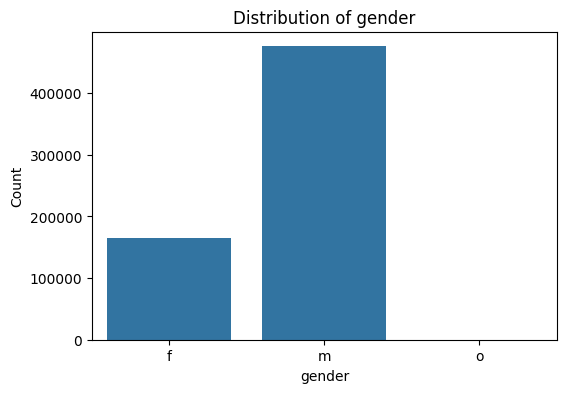

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data1)
plt.title('Distribution of gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.show()

In [20]:
data1['YoB'] = data1['YoB'].fillna(data1['YoB'].median())

In [21]:
data1.head(5)

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Bachelor's,1988.0,f,0,19/12/2012,17/11/2013,NaN,9.0,NaN,0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Bachelor's,1988.0,m,0,15/10/2012,NaN,NaN,9.0,1.0,0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,f,0,08/02/2013,17/11/2013,NaN,16.0,NaN,0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,m,0,17/09/2012,NaN,NaN,16.0,NaN,0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,f,0,19/12/2012,NaN,NaN,16.0,NaN,0


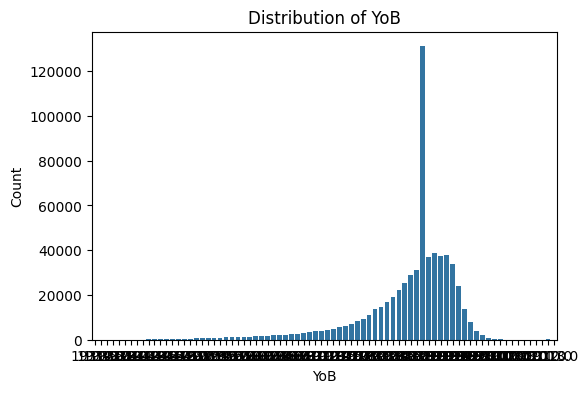

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='YoB', data=data1)
plt.title('Distribution of YoB')
plt.xlabel('YoB')
plt.ylabel('Count')
plt.show()

In [23]:
data1 = data1.dropna(subset=['grade'])
# Drop any rows where the 'grade' column has (NaN).

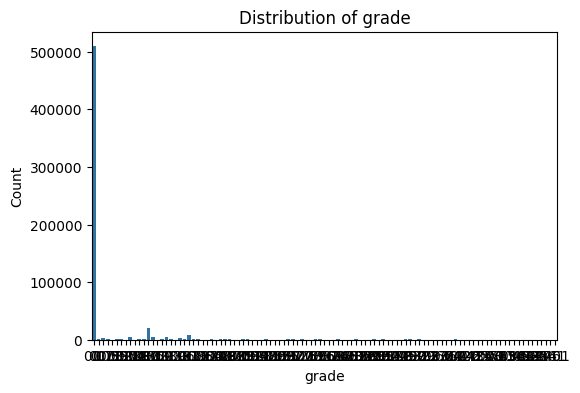

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='grade', data=data1)
plt.title('Distribution of grade')
plt.xlabel('grade')
plt.ylabel('Count')
plt.show()

In [25]:
data1.head(5)

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Bachelor's,1988.0,f,0,19/12/2012,17/11/2013,NaN,9.0,NaN,0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Bachelor's,1988.0,m,0,15/10/2012,NaN,NaN,9.0,1.0,0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,f,0,08/02/2013,17/11/2013,NaN,16.0,NaN,0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,m,0,17/09/2012,NaN,NaN,16.0,NaN,0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,f,0,19/12/2012,NaN,NaN,16.0,NaN,0


In [26]:
data1.shape

(592766, 18)

In [28]:
# Convert Columns to Date Format
data1['start_time_DI'] = pd.to_datetime(data1['start_time_DI'])
data1['last_event_DI'] = pd.to_datetime(data1['last_event_DI'])

# Compute the average number of days
duration = (data1['last_event_DI'] - data1['start_time_DI']).dt.days
mean_duration = duration.dropna().mean()

# Fill Missing last_event_DI with Estimated Dates
missing_mask = data1['last_event_DI'].isnull()
data1.loc[missing_mask, 'last_event_DI'] = data1.loc[missing_mask, 'start_time_DI'] + pd.to_timedelta(mean_duration, unit='D')

In [29]:
data1.dtypes

,0
index,int64
course_id,object
userid_DI,object
registered,int64
viewed,int64
explored,int64
certified,int64
final_cc_cname_DI,object
LoE_DI,object
YoB,float64


In [30]:
def impute_nchapters_simple_v3(data):
    # Create copy of original nchapters
    data['nchapters_imputed'] = data['nchapters'].copy()

    # Imputation logic based on certification and activity days
    mask = data['nchapters'].isna()

    conditions = [
        # Condition 1: Certified students
        (mask) & (data['certified'] == 1),
        # Condition 2: Not certified but active (ndays_act > 3)
        (mask) & (data['certified'] == 0) & (data['ndays_act'] > 3),
        # Condition 3: Not certified and some activity (ndays_act <= 3)
        (mask) & (data['certified'] == 0) & (data['ndays_act'] <= 3),
        # Condition 4: No activity recorded (ndays_act is NaN) but viewed course
        (mask) & (data['ndays_act'].isna()) & (data['viewed'] == 1),
        # Condition 5: No activity and never viewed (complete non-engagement)
        (mask) & (data['ndays_act'].isna()) & (data['viewed'] == 0)
    ]

    values = [
        16,  # Average for certified students
        3,   # Average for non-certified active students
        1,   # Minimal engagement
        1,   # Viewed but no sustained activity
        0    # Never engaged with content
    ]

    # Apply imputation
    data['nchapters_imputed'] = np.select(conditions, values, data['nchapters_imputed'])

    return data['nchapters_imputed']

# Use it in your pipeline
data1['nchapters_imputed'] = impute_nchapters_simple_v3(data1)

# Verify there are no missing values
print("Missing values after imputation:", data1['nchapters_imputed'].isna().sum())

Missing values after imputation: 0


🔺 This code in originally made by [Zeinab Beigi on Kaggle](https://www.kaggle.com/code/zeinabbeigi/preprocessing-for-recommendation-system-lms)

In [31]:
def impute_nevents(row):
    if pd.isna(row['nevents']):  # Only impute if the value is missing
        if row['nchapters'] == 0:
            return 0
        elif row['nchapters'] == 1:
            return np.random.choice([0, 1], p=[0.7, 0.3])
        elif 2 <= row['nchapters'] <= 5:
            return np.random.choice([0, 1, 2], p=[0.5, 0.3, 0.2])
        elif 6 <= row['nchapters'] <= 12:
            return np.random.choice([1, 2, 3], p=[0.4, 0.4, 0.2])
        else:
            return np.random.choice([2, 3, 4], p=[0.3, 0.4, 0.3])
    else:
        return row['nevents']  # Return original value if not missing

# Set random seed for reproducibility
np.random.seed(42)

# Create new column with imputed values
data1['nevents_imputed'] = data1.apply(impute_nevents, axis=1)

# Verify the imputation
print("Verification of imputation:")
print("Original missing values:", data1['nevents'].isna().sum())
print("New missing values:", data1['nevents_imputed'].isna().sum())

# Show distribution of original vs imputed values
print("\nDistribution of original nevents (excluding missing):")
print(data1['nevents'].value_counts(normalize=True).head())
print("\nDistribution of imputed nevents:")
print(data1['nevents_imputed'].value_counts(normalize=True).head())

Verification of imputation:
Original missing values: 188443
New missing values: 0

Distribution of original nevents (excluding missing):
nevents
1.0    0.143989
2.0    0.078489
3.0    0.039760
4.0    0.027127
5.0    0.021762
Name: proportion, dtype: float64

Distribution of imputed nevents:
nevents_imputed
1.0    0.134932
2.0    0.122468
3.0    0.106875
4.0    0.077714
0.0    0.073290
Name: proportion, dtype: float64


🔺 This code in originally made by [Zeinab Beigi on Kaggle](https://www.kaggle.com/code/zeinabbeigi/preprocessing-for-recommendation-system-lms)

In [33]:
median_ndays_act = data1['ndays_act'].median()

# Fill NaN values in 'ndays_act' with the calculated median
data1['ndays_act'].fillna(median_ndays_act, inplace=True)

# Verify that there are no more NaNs in that column
print(f"Median value used for filling: {median_ndays_act}")
print(f"Number of NaN values in 'ndays_act' after filling: {data1['ndays_act'].isnull().sum()}")

Median value used for filling: 2.0
Number of NaN values in 'ndays_act' after filling: 0


🔺 This code in originally made by [Zeinab Beigi on Kaggle](https://www.kaggle.com/code/zeinabbeigi/preprocessing-for-recommendation-system-lms)

In [34]:
data1.head(5)

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nchapters,nforum_posts,nchapters_imputed,nevents_imputed
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Bachelor's,1988.0,f,0,2012-12-19,2013-11-17 00:00:00.000000000,NaN,9.0,NaN,0,3.0,3.0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Bachelor's,1988.0,m,0,2012-10-15,2012-12-06 03:56:11.943158893,NaN,9.0,1.0,0,1.0,1.0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,f,0,2013-02-08,2013-11-17 00:00:00.000000000,NaN,16.0,NaN,0,3.0,4.0
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,m,0,2012-09-17,2012-11-08 03:56:11.943158893,NaN,16.0,NaN,0,3.0,3.0
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,f,0,2012-12-19,2013-02-09 03:56:11.943158893,NaN,16.0,NaN,0,3.0,2.0


In [35]:
pd.set_option('display.max_rows',100)
data1.isnull().sum().sort_values()

,0
index,0
course_id,0
userid_DI,0
registered,0
viewed,0
explored,0
certified,0
final_cc_cname_DI,0
LoE_DI,0
YoB,0


In [36]:
# Remove the duplicate columns
data1 = data1.drop(columns = 'nchapters')
data1 = data1.drop(columns = 'nevents')

In [37]:
data1.head(3)

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,ndays_act,nforum_posts,nchapters_imputed,nevents_imputed
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Bachelor's,1988.0,f,0,2012-12-19,2013-11-17 00:00:00.000000000,9.0,0,3.0,3.0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Bachelor's,1988.0,m,0,2012-10-15,2012-12-06 03:56:11.943158893,9.0,0,1.0,1.0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,f,0,2013-02-08,2013-11-17 00:00:00.000000000,16.0,0,3.0,4.0


In [38]:
data1.shape

(592766, 18)

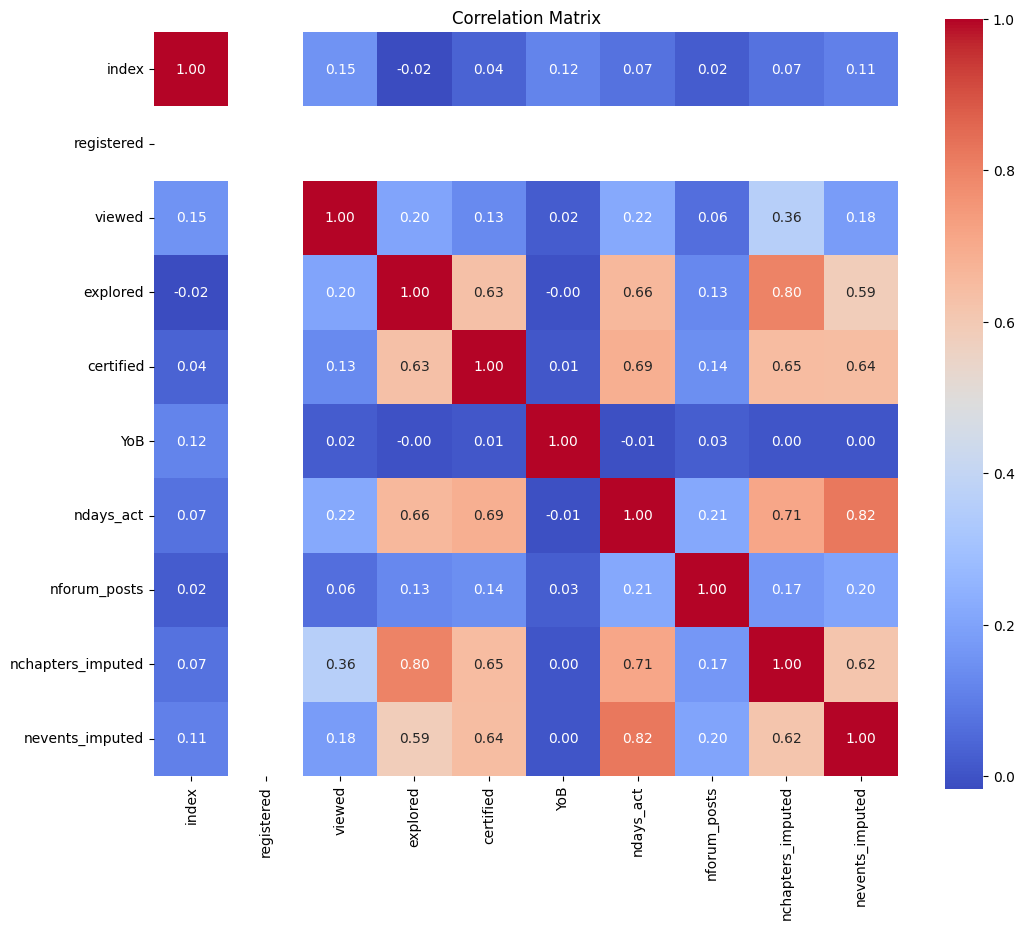

In [39]:
# View the correlation between numeric features after processing
numeric_data1 = data1.select_dtypes(include=['number']) # Select only numeric columns

corr = numeric_data1.corr() # Compute the correlation matrix

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

🔺 Again notice **'certified'** + **'nchapters_imputed'** + **'nevents_imputed'** + **'ndays_act'** + **'explored'**!

In [41]:
# Create bins to create the taget class accurately - nevent_imputed
data1['nevents_bin'] = pd.cut(data1['nevents_imputed'], bins=[-1, 10, 50, 100, 500, 1000, 5000, 10000, 70000])

# Calculate certification rate per bin
cert_rate = data1.groupby('nevents_bin')['certified'].mean()

print(cert_rate)

nevents_bin
(-1, 10]          0.000073
(10, 50]          0.000913
(50, 100]         0.004355
(100, 500]        0.017251
(500, 1000]       0.047567
(1000, 5000]      0.257329
(5000, 10000]     0.758694
(10000, 70000]    0.881591
Name: certified, dtype: float64


/tmp/ipython-input-1105760951.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cert_rate = data1.groupby('nevents_bin')['certified'].mean()


In [42]:
# Bin nchapters_imputed (more precise within 0–50)
data1['nchapters_bin'] = pd.cut(
    data1['nchapters_imputed'],
    bins=[-1, 1, 3, 5, 10, 20, 30, 40, 50]
)

# Calculate certification rate in each bin
cert_rate_chapters = data1.groupby('nchapters_bin')['certified'].mean()
print(cert_rate_chapters)

nchapters_bin
(-1, 1]     0.000006
(1, 3]      0.000142
(3, 5]      0.002465
(5, 10]     0.065737
(10, 20]    0.494821
(20, 30]    0.505757
(30, 40]    0.823751
(40, 50]    0.738095
Name: certified, dtype: float64


/tmp/ipython-input-2004747045.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cert_rate_chapters = data1.groupby('nchapters_bin')['certified'].mean()


In [43]:
pd.set_option('display.max_rows',100)
data1.isnull().sum().sort_values()

,0
index,0
course_id,0
userid_DI,0
registered,0
viewed,0
explored,0
certified,0
final_cc_cname_DI,0
LoE_DI,0
YoB,0


In [44]:
# Remove the unnecessary columns
data1 = data1.drop(columns = 'nevents_bin')
data1 = data1.drop(columns = 'nchapters_bin')

In [45]:
data1.head(3)

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,ndays_act,nforum_posts,nchapters_imputed,nevents_imputed
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Bachelor's,1988.0,f,0,2012-12-19,2013-11-17 00:00:00.000000000,9.0,0,3.0,3.0
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Bachelor's,1988.0,m,0,2012-10-15,2012-12-06 03:56:11.943158893,9.0,0,1.0,1.0
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,f,0,2013-02-08,2013-11-17 00:00:00.000000000,16.0,0,3.0,4.0


🔺 Done!

In [46]:
# Create the taget class based on what we noticed after processing on the dataset
data1['dropout'] = (
    (data1['certified'] == 0) &                  # Not certified
    (data1['nchapters_imputed'] <= 5) &          # Low chapter engagement
    (data1['nevents_imputed'] < 1000)            # Low click/event activity
).astype(int)

In [49]:
data1.head(20)

,index,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,ndays_act,nforum_posts,nchapters_imputed,nevents_imputed,dropout
0,0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,Bachelor's,1988.0,f,0,2012-12-19,2013-11-17 00:00:00.000000000,9.0,0,3.0,3.0,1
1,1,HarvardX/CS50x/2012,MHxPC130442623,1,1,0,0,United States,Bachelor's,1988.0,m,0,2012-10-15,2012-12-06 03:56:11.943158893,9.0,0,1.0,1.0,1
2,2,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,f,0,2013-02-08,2013-11-17 00:00:00.000000000,16.0,0,3.0,4.0,1
3,3,HarvardX/CS50x/2012,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,m,0,2012-09-17,2012-11-08 03:56:11.943158893,16.0,0,3.0,3.0,1
4,4,HarvardX/ER22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,f,0,2012-12-19,2013-02-09 03:56:11.943158893,16.0,0,3.0,2.0,1
5,5,HarvardX/PH207x/2012_Fall,MHxPC130275857,1,1,1,0,United States,Bachelor's,1988.0,m,0,2012-09-17,2013-05-23 00:00:00.000000000,16.0,0,12.0,502.0,0
6,6,HarvardX/PH278x/2013_Spring,MHxPC130275857,1,0,0,0,United States,Bachelor's,1988.0,m,0,2013-02-08,2013-04-01 03:56:11.943158893,16.0,0,3.0,2.0,1
7,7,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,Bachelor's,1988.0,f,0,2013-01-01,2013-05-14 00:00:00.000000000,6.0,0,3.0,42.0,1
8,8,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,Bachelor's,1988.0,f,0,2013-02-18,2013-03-17 00:00:00.000000000,3.0,0,3.0,70.0,1
9,9,HarvardX/CS50x/2012,MHxPC130088379,1,1,0,0,United States,Bachelor's,1988.0,f,0,2012-10-20,2012-12-11 03:56:11.943158893,12.0,0,3.0,0.0,1


🔺 The final cleaned version!

In [50]:
data1.shape

(592766, 19)

In [51]:
# Inspect the taget class before further work
data1['dropout'].value_counts()

,count
dropout,
1,527943
0,64823


🔺 Noticeable imbalance!

In [52]:
pd.set_option('display.max_rows',100)
data1.isnull().sum().sort_values()

,0
index,0
course_id,0
userid_DI,0
registered,0
viewed,0
explored,0
certified,0
final_cc_cname_DI,0
LoE_DI,0
YoB,0


In [53]:
data1.to_csv('cleaned_dataset.csv', index=False)